Imports


In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Training Data


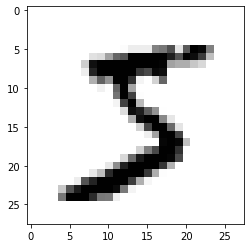

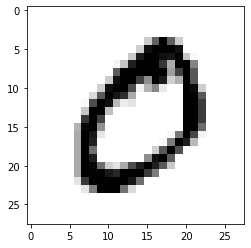

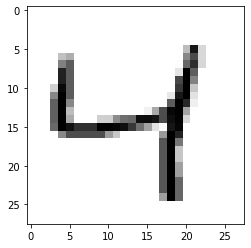

In [41]:

mnist = tf.keras.datasets.mnist #28x28 images of 0-9 handwritten digits

(training_data, training_label), (test_data, test_label) = mnist.load_data()

# normalizing our data to 0-1 values so its easier for the network to learn
# training_data = tf.keras.utils.normalize(training_data, axis=1)
# test_data = tf.keras.utils.normalize(test_data, axis=1)

plt.imshow(training_data[0],cmap = plt.cm.binary) #binary is a b&w image
plt.show()
plt.imshow(training_data[1],cmap = plt.cm.binary) 
plt.show()
plt.imshow(training_data[2],cmap = plt.cm.binary) 
plt.show()
 

Training our model

![alt text](https://assets.digitalocean.com/articles/handwriting_tensorflow_python3/cnwitLM.png)

In [37]:
# sequantial model makes lots of layers like a neural network 
# a plain stack of layers where each layer has exactly one input tensor and one output tensor. 

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #input of 28x28 image
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)  
])
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_data, training_label, epochs = 10)
print("Training Accuracy")
model.evaluate(training_data,training_label)

model.save("MNIST_1.26%_Keilin_Chiu.h5")


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2100 - accuracy: 0.9359
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0864 - accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0604 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0452 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0352 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0305 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

Testing our model

Test Accuracy
313/313 [==============================] - 1s 3ms/step - loss: 78.2414 - accuracy: 0.9690


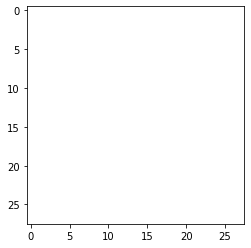

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CNN Error: 3.11%


In [43]:
print("Test Accuracy")
val_loss, val_acc =  model.evaluate(test_data,test_label)
predict = model.predict(test_data)
np.set_printoptions(suppress=True)
test_data[3] = tf.keras.utils.normalize(test_data[3], axis=1)
plt.imshow(test_data[3],cmap = plt.cm.binary) #binary is a b&w image
plt.show()
print(predict[3])
scores = model.evaluate(test_data, test_label, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))